In [3]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc import adia_analysis

## large detuning, BAQ 

{'Q1_freq': '6000.0MHz', 'Q1_anhar': '-125.0MHz', 'Q2_freq': '9000.0MHz', 'Q2_anhar': '-150.0MHz', 'Q3_freq': '5850.0MHz', 'Q3_anhar': '-125.0MHz', 'g12': '132.2724MHz', 'g13': '9.4792MHz', 'g23': '130.6086MHz'}


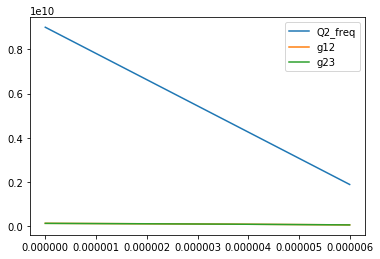

In [76]:
raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

flux_pulse = np.linspace(0/9,8/9,6000)
# flux_pulse = np.linspace(8/9,0/9,6000)
freq_array = 9e9 -flux_pulse * (9e9 - 1e9)

raw_config.setValue('Q1 f01_max',6.00e9)
raw_config.setValue('Q2 f01_max',9e9)
raw_config.setValue('Q3 f01_max',5.76e9)
raw_config.setValue('Q1 f01_min',1e9)
raw_config.setValue('Q2 f01_min',1e9)
raw_config.setValue('Q3 f01_min',1e9)
raw_config.setValue('Q1 Ec',0.25e9)
raw_config.setValue('Q2 Ec',0.3e9)
raw_config.setValue('Q3 Ec',0.15e9)

raw_config.setValue('r12',0.018)
raw_config.setValue('r23',0.018)
raw_config.setValue('r13',0.0016)

raw_config.setValue('Q2 Voltage period',-1)
raw_config.setValue('Q2 Voltage operating point',0.00)
raw_config.setValue('Q2 Flux',flux_pulse)

# raw_config.setValue('Uniform XY LO',True)
# raw_config.setValue('XY LO Freq',5.94e9)

simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.show_pulse()

In [77]:
Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=2e6)

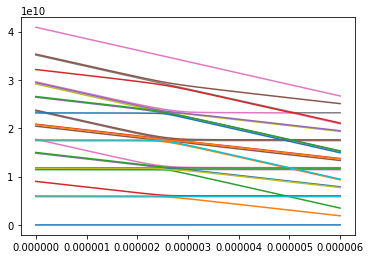

In [78]:
Simulator.EigenResult.show_eigenenergy()

In [93]:
%matplotlib inline

(-1, 4)

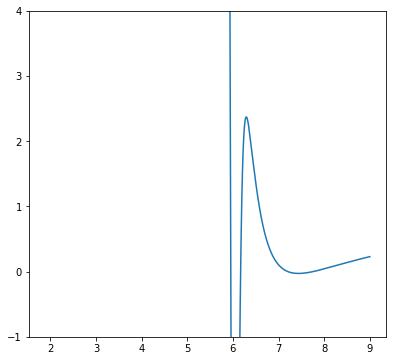

In [7]:
eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
fig = plt.figure(figsize=[6.4,6])
ax = fig.add_subplot(111)
# ZZ_from_top_00024 = eigen_trace
# ZZ_from_top_00012 = eigen_trace
ZZ_from_top_00018 = eigen_trace
ax.plot(freq_array/1e9,eigen_trace/1e6)
ax.set_ylim([-1,4])

In [8]:
Eigen101=Simulator.EigenResult.eigen_ener[:,10]/1e9
Eigen011=Simulator.EigenResult.eigen_ener[:,4]/1e9
Eigen110=Simulator.EigenResult.eigen_ener[:,12]/1e9
Eigen200=Simulator.EigenResult.eigen_ener[:,18]/1e9
Eigen020=Simulator.EigenResult.eigen_ener[:,6]/1e9
Eigen002=Simulator.EigenResult.eigen_ener[:,2]/1e9
Eigen001=Simulator.EigenResult.eigen_ener[:,1]/1e9
Eigen010=Simulator.EigenResult.eigen_ener[:,3]/1e9
Eigen100=Simulator.EigenResult.eigen_ener[:,9]/1e9

(3.6, 13.6)

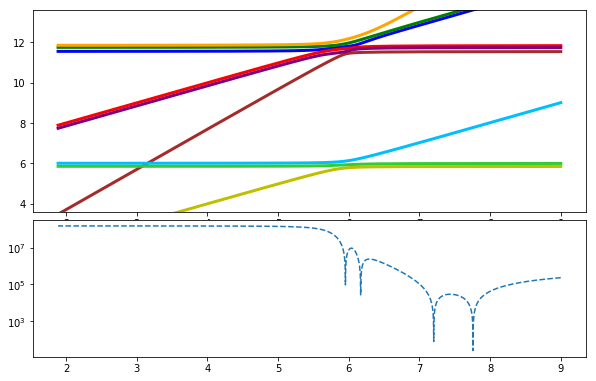

In [9]:
fig=plt.figure(figsize=[9.6,5.6])
# ax = fig.add_subplot(111)
ax = fig.add_axes([0.1,0.46,0.8,0.5])
ax2 = fig.add_axes([0.1,0.1,0.8,0.34])

lw=3
ax.plot(freq_array/1e9,Eigen011,label='011',linewidth=lw,c='blue')
ax.plot(freq_array/1e9,Eigen101,label='101',linewidth=lw,c='red')
ax.plot(freq_array/1e9,Eigen110,label='110',linewidth=lw,c='green')
ax.plot(freq_array/1e9,Eigen002,label='002',linewidth=lw,c='brown')
ax.plot(freq_array/1e9,Eigen020,label='020',linewidth=lw,c='orange')
ax.plot(freq_array/1e9,Eigen200,label='200',linewidth=lw,c='purple')
ax.plot(freq_array/1e9,Eigen001,label='001',linewidth=lw,c='y')
ax.plot(freq_array/1e9,Eigen010,label='010',linewidth=lw,c='deepskyblue')
ax.plot(freq_array/1e9,Eigen100,label='100',linewidth=lw,c='limegreen')

ax2.plot(freq_array/1e9,np.abs(ZZ_from_top_00018),'--')
# ax2.plot(freq_array/1e9,-1*ZZ_from_top_00012)
# ax2.plot(freq_array/1e9,-1*ZZ_from_top_00000)

ax2.set_yscale('log')
ax.set_ylim([3.6,13.6])

In [80]:

flux_pulse = np.linspace(0/8,3/8,451)
freq_array = 9e9 -flux_pulse * (9e9 - 1e9)

In [11]:
%matplotlib inline

In [102]:
ZZ_TRACE=[]
r_arr = np.linspace(0,0.003,121)
for r13 in r_arr:
    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

    flux_pulse = np.linspace(0/8,3/8,451)
    freq_array = 9e9 -flux_pulse * (9e9 - 1e9)

    raw_config.setValue('Q1 f01_max',6.00e9)
    raw_config.setValue('Q2 f01_max',9e9)
    raw_config.setValue('Q3 f01_max',5.4e9)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.3e9)
    raw_config.setValue('Q3 Ec',0.25e9)

    raw_config.setValue('r12',0.018)
    raw_config.setValue('r23',0.018)
    raw_config.setValue('r13',r13)

    raw_config.setValue('Q2 Voltage period',-1)
    raw_config.setValue('Q2 Voltage operating point',0.00)
    raw_config.setValue('Q2 Flux',flux_pulse)

    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)
    Simulator.performsimulation(solver_type=2,resample_factor=1,eigen_cloest_to_bare=False,sort_by_maximum_overlap=True,gap=10e6)
    eigen_trace = Simulator.EigenResult.get_Ener_gap_trace('101-100-001+000')
    print(r13)
    ZZ_TRACE.append(eigen_trace)

0.0
2.5e-05
5e-05
7.500000000000001e-05
0.0001
0.000125
0.00015000000000000001
0.000175
0.0002
0.00022500000000000002
0.00025
0.000275
0.00030000000000000003
0.00032500000000000004
0.00035
0.000375
0.0004
0.00042500000000000003
0.00045000000000000004
0.000475
0.0005
0.0005250000000000001
0.00055
0.000575
0.0006000000000000001
0.000625
0.0006500000000000001
0.000675
0.0007
0.0007250000000000001
0.00075
0.0007750000000000001
0.0008
0.000825
0.0008500000000000001
0.000875
0.0009000000000000001
0.000925
0.00095
0.0009750000000000001
0.001
0.001025
0.0010500000000000002
0.001075
0.0011
0.0011250000000000001
0.00115
0.001175
0.0012000000000000001
0.001225
0.00125
0.001275
0.0013000000000000002
0.001325
0.00135
0.0013750000000000001
0.0014
0.001425
0.0014500000000000001
0.001475
0.0015
0.001525
0.0015500000000000002
0.001575
0.0016
0.0016250000000000001
0.00165
0.001675
0.0017000000000000001
0.0017250000000000002
0.00175
0.001775
0.0018000000000000002
0.001825
0.00185
0.0018750000000000001
0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


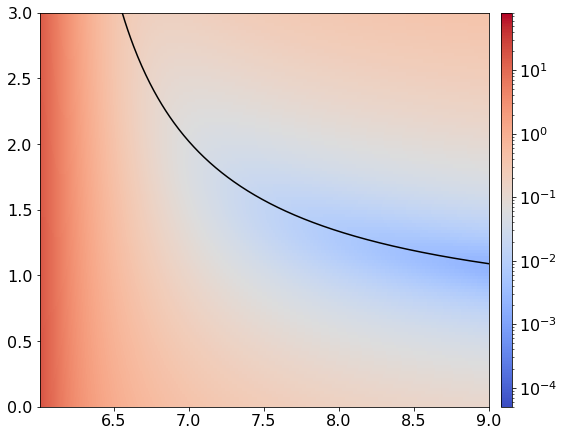

In [103]:
from matplotlib import cm
from matplotlib import *


ZZ_TRACE = np.array(ZZ_TRACE)

fig = plt.figure(figsize=[8,7.2])
ax = fig.add_axes([0.1,0.1,0.78,0.76])
ax_colorbar = fig.add_axes([0.9,0.1,0.02,0.76])
X,Y = np.meshgrid(freq_array[0:450]/1e9,r_arr*1000)
im = ax.pcolor(X,Y,np.abs(ZZ_TRACE[:,0:450])/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=5e-5,vmax=80)
colarbar= plt.colorbar(im,cax=ax_colorbar)


ax.plot(freq_array[0:451]/1e9,r12_zero_geff(6e9,5.4e9,freq_array[0:451],0.018,0.018)*1000,'k')
# ax.plot(freq_array[0:451]/1e9,r12_zero_geff_y(6e9,5.85e9,freq_array[0:451],0.018,0.018,300e6)*1000,'b')
# ax.plot(freq_array[0:451]/1e9,r12_zero_geff(6e9,5.85e9,freq_array[0:451],0.018,0.018)*1000,'r')






ax.set_ylim([0,3])
ax.tick_params(labelsize=16)
ax_colorbar.tick_params(labelsize=16)

In [66]:
def r12_zero_geff(w1,w2,wc,r1c,r2c):
    g1cg2c = np.sqrt(w1*wc)*r1c*np.sqrt(w2*wc)*r2c
    g12 = -g1cg2c*(1/(w1-wc)+1/(w2-wc)-1/(w1+wc)-1/(w2+wc))/2
    return g12/(np.sqrt(w1*w2))

def r12_zero_geff_xp(w1,w2,wc,r1c,r2c):
    g1cg2c = np.sqrt(w1*wc)*r1c*np.sqrt(w2*wc)*r2c
    geff = 0.5*g1cg2c*(1/(w1-wc)+1/(w2-wc)-1/(w1+wc)-1/(w2+wc))
    x = 0.5*g1cg2c*(w1-w2)/( (w1-wc)*(w2-wc) )
    g12 = -1*(geff+x)
    return g12/(np.sqrt(w1*w2))

def r12_zero_geff_xm(w1,w2,wc,r1c,r2c):
    g1cg2c = np.sqrt(w1*wc)*r1c*np.sqrt(w2*wc)*r2c
    geff = 0.5*g1cg2c*(1/(w1-wc)+1/(w2-wc)-1/(w1+wc)-1/(w2+wc))
    x = 0.5*g1cg2c*(w1-w2)/( (w1-wc)*(w2-wc) )
    g12 = -1*(geff-x)
    return g12/(np.sqrt(w1*w2))

def r12_zero_geff_y(w1,w2,wc,r1c,r2,anharc):
    g1cg2c = np.sqrt(w1*wc)*r1c*np.sqrt(w2*wc)*r2c
    geff = 0.5*g1cg2c*(1/(w1-wc)+1/(w2-wc)-1/(w1+wc)-1/(w2+wc))
    y = 0.5*g1cg2c*anharc/( (w1-wc)*(w2-wc) )
    g12 = -1*(geff+y)
    return g12/(np.sqrt(w1*w2))

In [67]:
def ZZ_final(fqc,*args):
    fq1,fq2,anhar1,anharc,anhar2,r1c,r2c,r12=args
    g12 = r12*np.sqrt(fq1*fq2)
    g1c = r1c*np.sqrt(fq1*fqc)
    g2c = r2c*np.sqrt(fq2*fqc)
    delta12 = fq1-fq2
    delta1c = fq1-fqc
    delta2c = fq2-fqc
    epsilon12 = fq1+fq2
    epsilon1c = fq1+fqc
    epsilon2c = fq2+fqc
    alpha = delta12+anhar1
    beta = delta12-anhar2
    geff = g12+g1c*g2c/2*(1/delta1c+1/delta2c-1/epsilon2c-1/epsilon1c)
    x = g1c*g2c/2*delta12/(delta1c*delta2c)
    y = g1c*g2c/2*anharc/(delta1c*delta2c)
    return 2/beta*(geff-x)**2-2/alpha*(geff+x)**2+4*g1c*g2c/(delta1c*delta2c)*(geff+y)

In [106]:
%matplotlib qt

## numerical simu

In [104]:
ZZ_TRACE_cal=[]
r_arr = np.linspace(0,0.003,121)
for r12 in r_arr:
    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='ground',sampling_rate=1e9)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

    flux_pulse = np.linspace(0/8,3/8,451)
    freq_array = 9e9 -flux_pulse * (9e9 - 1e9)

    fq1 = 6e9
    fq2 = 5.4e9
    anhar1=-250e6
    anhar2=-250e6
    anharc=-300e6
    r12 = r12
    r1c = 0.018
    r2c = 0.018
    fqc = freq_array
    
    eigen_trace_cal = ZZ_final(fqc,*(fq1,fq2,anhar1,anharc,anhar2,r1c,r2c,r12))
    
    ZZ_TRACE_cal.append(eigen_trace_cal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in add
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [39]:
# len(freq_array)

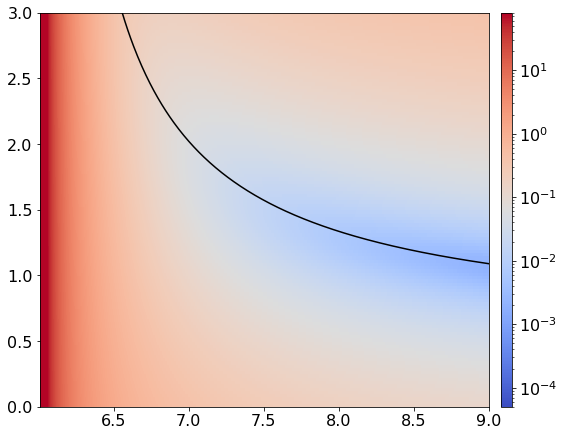

In [106]:
from matplotlib import cm
from matplotlib import *

ZZ_TRACE_cal = np.array(ZZ_TRACE_cal)

fig = plt.figure(figsize=[8,7.2])
ax = fig.add_axes([0.1,0.1,0.78,0.76])
ax_colorbar = fig.add_axes([0.9,0.1,0.02,0.76])
X,Y = np.meshgrid(freq_array[:450]/1e9,r_arr*1000)
im = ax.pcolor(X,Y,np.abs(ZZ_TRACE_cal[:,0:450])/1e6,cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=5e-5,vmax=80)
colarbar= plt.colorbar(im,cax=ax_colorbar)


ax.plot(freq_array[0:450]/1e9,r12_zero_geff(6e9,5.4e9,freq_array[0:450],0.018,0.018)*1000,'k')

ax.set_ylim([0,3])
ax.tick_params(labelsize=16)
ax_colorbar.tick_params(labelsize=16)

In [107]:
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_pertur.txt',ZZ_TRACE_cal[:,0:450])
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_pertur_freq_array.txt',freq_array[:450])
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_pertur_r_array.txt',r_arr)

In [108]:
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_numer.txt',ZZ_TRACE[:,0:450])
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_numer_freq_array.txt',freq_array[:450])
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_numer_r_array.txt',r_arr)

In [109]:
np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_r_zero_geff.txt',r12_zero_geff(6e9,5.4e9,freq_array[0:450],0.018,0.018))



In [18]:
fq1 = 6e9
fq2 = 5.8e9
anhar1=-250e6
anhar2=-250e6
anharc=-300e6
r12 = 0.0016
r1c = 0.018
r2c = 0.018
fqc = np.linspace(9e9,6.1e9,1000)


## plot all figures

In [111]:
LD_pertur = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_pertur.txt')
LD_numeri = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_numer.txt')

ST_pertur = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\straddle_pertur.txt')
ST_numeri = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\straddle_numer.txt')

freq_arr = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_pertur_freq_array.txt')
r_arr = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_pertur_r_array.txt')

ST_geff = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\straddle_r_zero_geff.txt')
LD_geff = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\pertur\largedetune_r_zero_geff.txt')

In [120]:
# ST_geff

In [127]:
from matplotlib import cm
from matplotlib import *

fig=plt.figure(figsize=[9.8,8.4])

X, Y = np.meshgrid(freq_arr/1e9,r_arr*1000)

min_value=5e-5
max_value=50

ax1=fig.add_subplot(221)
surf1=ax1.pcolor(X,Y,abs(LD_numeri/1e6),cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=min_value,vmax=max_value)

ax2=fig.add_subplot(222)
surf2=ax2.pcolor(X,Y,abs(ST_numeri/1e6),cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=min_value,vmax=max_value)



ax3=fig.add_subplot(223)
surf3=ax3.pcolor(X,Y,abs(LD_pertur/1e6),cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=min_value,vmax=max_value)


ax4=fig.add_subplot(224)
surf4=ax4.pcolor(X,Y,abs(ST_pertur/1e6),cmap=cm.coolwarm,norm=colors.LogNorm(),vmin=min_value,vmax=max_value)

ax3.plot(freq_arr/1e9,LD_geff*1000,c='k',linestyle='-')
ax4.plot(freq_arr/1e9,ST_geff*1000,c='k',linestyle='-')

position2=fig.add_axes([0.125, 0.05, 0.775, 0.015])
colarbar2=plt.colorbar(surf2,orientation='horizontal',cax=position2)

# ax1.set_xticks([1,2,3,4])
# ax1.set_yticks([1,3,5,7])
# ax2.set_xticks([1,2,3,4])
# ax2.set_yticks([1,3,5,7])
# ax3.set_xticks([1,2,3,4])
# ax3.set_yticks([1,3,5,7])
# ax4.set_xticks([1,2,3,4])
# ax4.set_yticks([1,3,5,7])

ax1.set_ylim([0,3])
ax2.set_ylim([0,3])
ax3.set_ylim([0,3])
ax4.set_ylim([0,3])

ax1.tick_params(labelsize=24)
ax1.tick_params(top=True,direction='in')
ax1.tick_params(bottom=True,direction='in')
ax1.tick_params(right=True,direction='in')
ax1.tick_params(left=True,direction='in')

ax2.tick_params(labelsize=24)
ax2.tick_params(top=True,direction='in')
ax2.tick_params(bottom=True,direction='in')
ax2.tick_params(right=True,direction='in')
ax2.tick_params(left=True,direction='in')

ax3.tick_params(labelsize=24)
ax3.tick_params(top=True,direction='in')
ax3.tick_params(bottom=True,direction='in')
ax3.tick_params(right=True,direction='in')
ax3.tick_params(left=True,direction='in')

ax4.tick_params(labelsize=24)
ax4.tick_params(top=True,direction='in')
ax4.tick_params(bottom=True,direction='in')
ax4.tick_params(right=True,direction='in')
ax4.tick_params(left=True,direction='in')


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

plt.subplots_adjust(wspace =0.04, hspace =0.04)

position2.tick_params(labelsize=22)


In [126]:
%matplotlib qt